<!-- Assignment 1 Heading -->
# <span style='color:#7C93C3'>Assignment 1</span>

<!-- Subtitle with Styling -->
## <span style='color:#7C93C3'>Descriptive Analytics and Data Preprocessing on Sales and Discount Dataset</span>

### <span style='color:#6A9C89'>Importing Packages</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
print('Successfully Imported')

Successfully Imported


### <span style='color:#6A9C89'>Loading the Dataset</span>

In [2]:
data = pd.read_csv('sales_data_with_discounts.csv')
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


### <span style='color:#6A9C89'>Analyzing the Stats about the data</span>

#### <span style='color:#629584'>INTRODUCTION</span>

In [3]:
data.shape

(450, 13)

The data set has 450 rows and 13 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


We can see that the columns has 3 types of data types i.e., Object, Integer and float.
1. Float64 :- 3
2. Integer64 :- 3
3. Object :- 7

In [5]:
data.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

Now, we can see that we don't have any null values in the columns. So, we don't need to pre-process the datasets.

In [6]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


We can clearly see the count, mean, standard deviation etc throught the table.

### <span style='color:#387478'>Descriptive Analytics for Numerical Columns</span>

Identifying the Numerical Columns in the dataset

In [7]:
num_cols = data.select_dtypes(include=['int64','float64'])
num_cols.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


Let's find the mean, median, mode and standard deviation for the numerical columns

In [17]:
for i in num_cols:
    print(f'For {i}')
    print(f'Mean = {num_cols[i].mean()}')
    print(f'Median = {num_cols[i].median()}')
    print(f'Mode = {num_cols[i].mode()}')
    print(f'Standard Deviation = {num_cols[i].std()}')
    print('\n\n')

For Volume
Mean = 5.066666666666666
Median = 4.0
Mode = 0    3
Name: Volume, dtype: int64
Standard Deviation = 4.231602391213923



For Avg Price
Mean = 10453.433333333332
Median = 1450.0
Mode = 0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64
Standard Deviation = 18079.90483993647



For Total Sales Value
Mean = 33812.83555555555
Median = 5700.0
Mode = 0    24300
Name: Total Sales Value, dtype: int64
Standard Deviation = 50535.07417255325



For Discount Rate (%)
Mean = 15.155241895330914
Median = 16.57776564929597
Mode = 0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64
Standard Deviation = 4.22060215332551



For Discount Amount
Mean = 3346.499424342415
Median = 988.9337332382784
Mode = 0         69.177942
1         73.025199
2         93.649161
3         94.682735


## <span style='color:#629584'> Data Vizualiztion </span>

#### <span style='color:#629584'>Histograms</span>

So, lets plot the hisograms for the numerical columns (num_cols) 

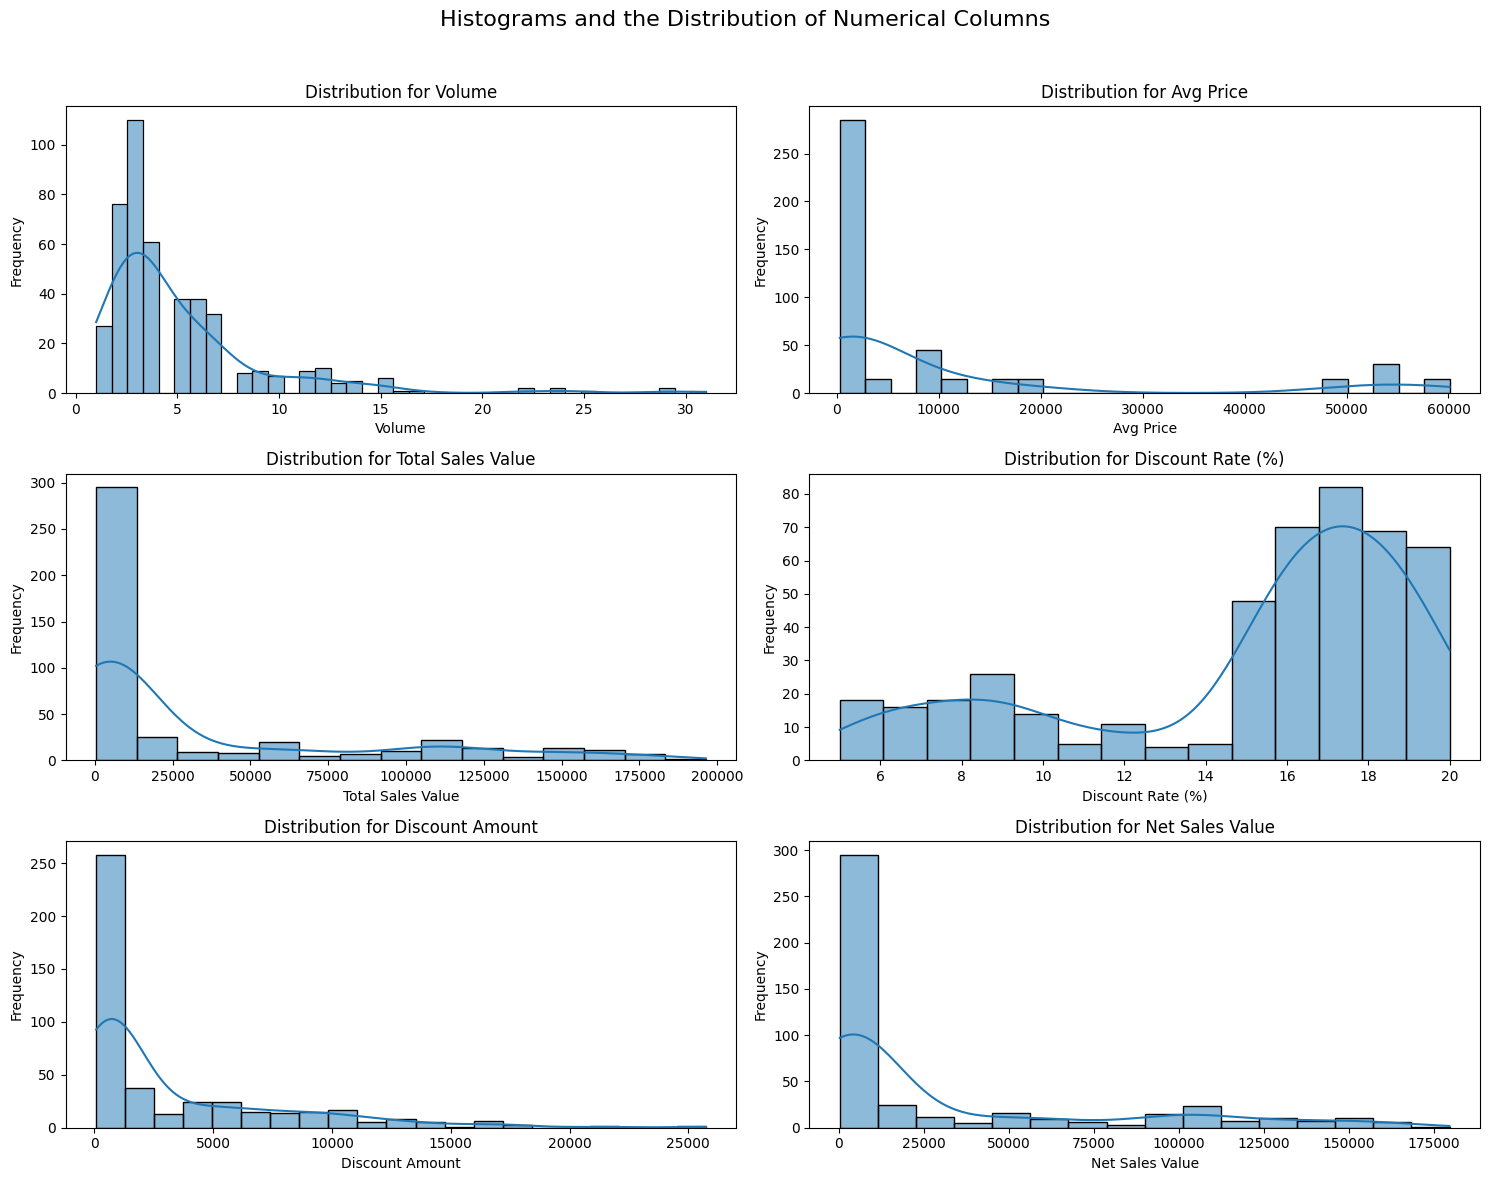

In [65]:
plt.figure(figsize=(15, 12))  
plt.suptitle('Histograms and the Distribution of Numerical Columns', fontsize=16)

for idx, i in enumerate(num_cols, 1):
    plt.subplot(3, 2, idx)
    sns.histplot(data=data, x=i, kde=True) 
    plt.title(f'Distribution for {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## <span style='color:#798645'>Analysis of the Histogram Distributions</span>

##### 1. VOLUME 
    Skewness : Right-skewed (poistively skewed) 
    Outliers : There are potential outliers on the higher end of the distribution, where a few transactions have significantly higher volumns. 
    Inference : Most of the transaction involves small sales valumes (around 3 units), but there are occasional larger sales.

##### 2. AVG PRICE
    Skewness : Highly right-skewed. 
    Outliers : There are clear outliers, where a small number of products have significantly higher average prices. 
    Inference : The dataset includes a wide range of products, with most having low to moderate prices and a fedw luxury or high-priced items inflating the average. 

##### 3. TOTAL SALES VALUE
    Skewness : Highly Right-Skewed
    Outliers : Presence of high-value transactions, indicating outliers on the upper end.
    Inference : While most transactions have low sales values, some high-values sales are present, possibly from bulk purchases or expensive products.

##### 4. DISCOUNT RATE (%)
    Skewness : Silghtly left-skewed.
    Outliers : The presence of outliers might be minimal, though some transactions have notably high discount rate.
    Inference : Most discount rate are clusetered around the 15% mark, with only a few extreme values above this.

##### 5. DISCOUNT AMOUNT:
    Skewness : Right-Skewed
    Outliers : Significant outliers with very high discount amounts.
    Inference : Most discounts are small, but there are a few transactions where a large discounts were applied, potentially for high priced items.

##### 6. NET SALES VALUE:
    Skewness : Right Skewed 
    Outliers : The distribution has outliers with high net sales values.
    Inference : Similar to the total sales value, most net sales are on the lower end, with a few high-value transactions that significantly impact the distractions.

### <span style='color:#629584'>GENERAL INFERENCE</span>

The numerical data is generally right-skewed, meaning most transactions involve lower sales volumns, prices, and discount amounts, but there are a few high-value transactions. The presence of outliers suggests that a small subset of products or transactions drives much of the variance in the data. This may indicate that the dataset covers a mix of regular and premium products or high-volume transactions that stand out from the rest.



#### <span style='color:#629584'>Box-Plots</span>

After the histograms and the distributions of the numerical columns and the details discussion of the columns, let's have a look on the outliers present in the data, and how they are present.

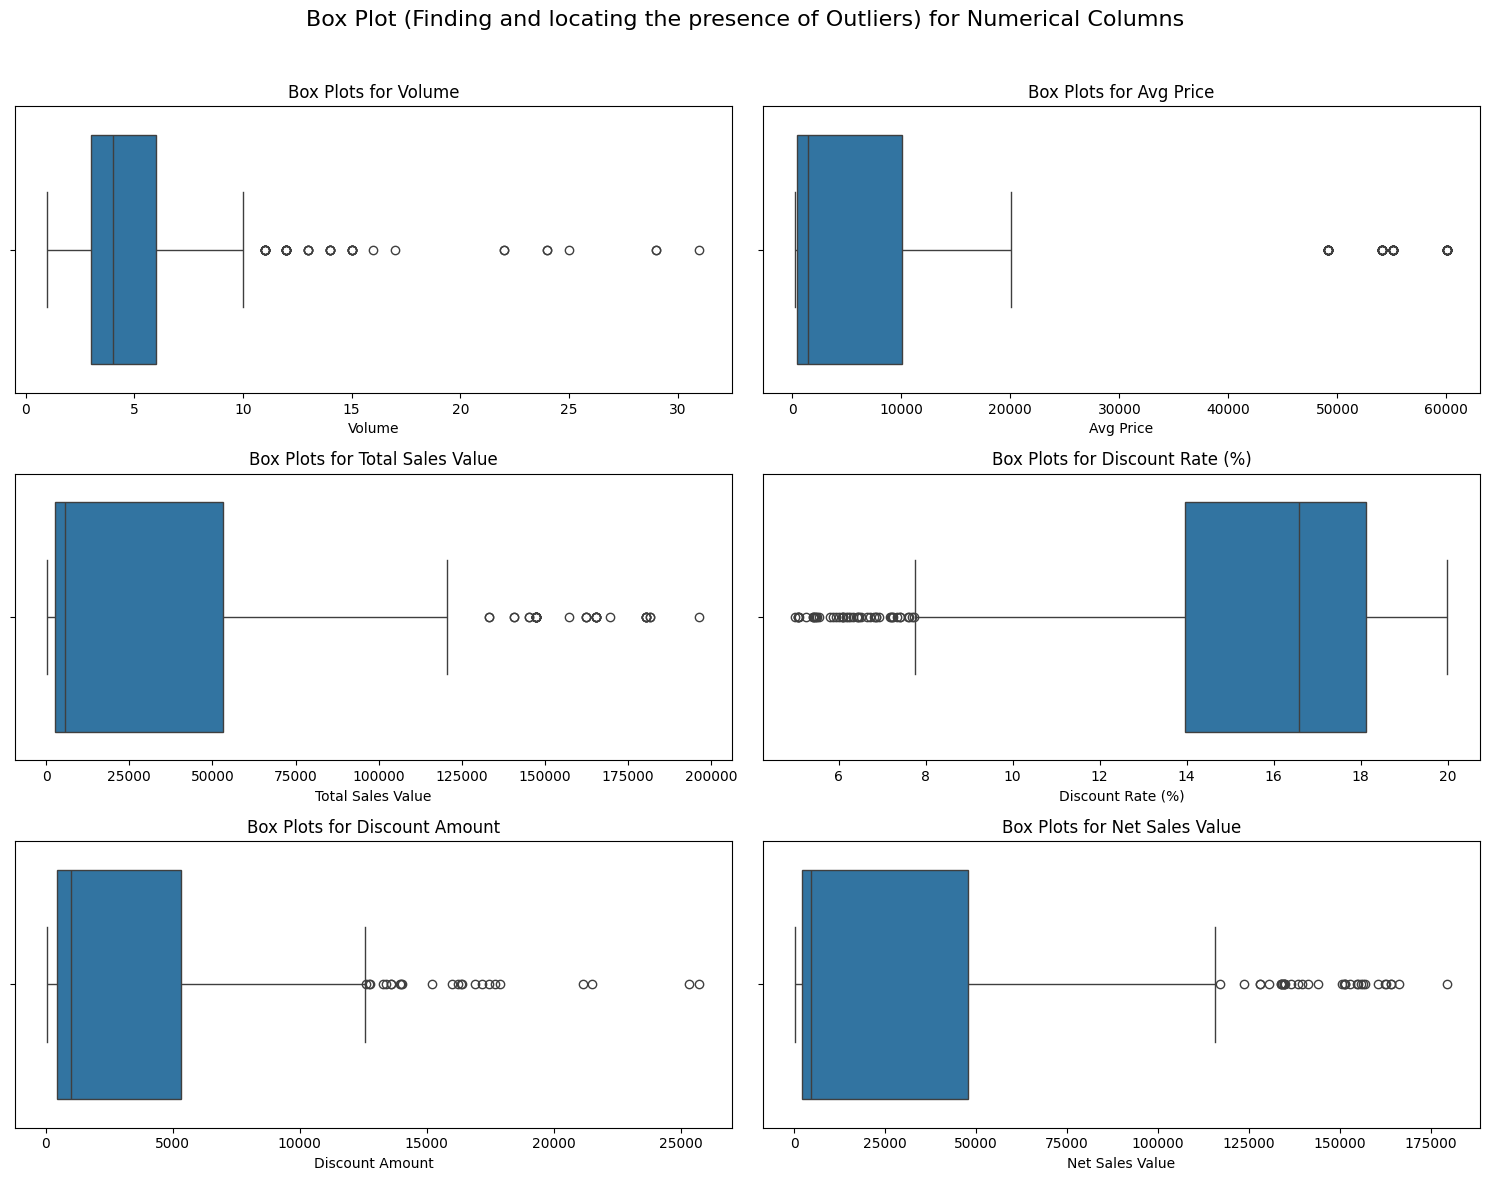

In [40]:
plt.figure(figsize=(15, 12))  
plt.suptitle('Box Plot (Finding and locating the presence of Outliers) for Numerical Columns', fontsize=16)

for idx, i in enumerate(num_cols, 1):
    plt.subplot(3, 2, idx)
    sns.boxplot(data=data, x=i) 
    plt.title(f'Box Plots for {i}')
    

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## <span style='color:#798645'>Analysis of the Box Plots and IQR (Inter-Quartile Range) & The presence of Outliers</span>

### <span style='color:#798645'>Box Plot Insights </span>
##### 1. VOLUME
    Interquartile Range (IQR): 
    The minimum and maximum value of the column according to the box plot is likely to be in the range of [0-10], where the 25% of the data is likely to remain at (3) and 75% of the data is likely to remain at 6, and so the 50% of the data will likely to be clustered around the lower sales volumes (close to the median 4 units).
    
    Outliers:
    We can see there is a medial level of outliers present in the data, and we expect some higher sales volumes that will apperar as points outside the whiskers (potential outliers).

##### 2. AVG PRICE
    Interquartile Range (IQR):
    The data is more spreaded between the range of minimum value to 75 percentile of the data, following with the Interquartile Range [0-20000], and there is a presence of mediate upper-whisker, as compare to the lower-whisker.

    Outliers:
    We can see there is a less number of outliers in the data and it is more likely to have higher average price.

##### 3. TOTAL SALES VALUE:
    Interquartile Range (IQR):
    There is found to be a shrinkage in the range of [25-50] percentile and The data is more likely to be spread in the range of [50-75] percentile. While having a short lower-whisker with compare to longer upper-whisker in the data. 

    Outliers:
    Presence of few outliers can be seen in the higher value of the Total Sales Values.

##### 4. DISCOUNT RATE (%):
    Interquartile Range (IQR):
    We can see that the data is usually distributed in [25-75] percentile, having a large lower-whisker and a small upper whisker. The 50 percentile of the data is more likely be shifted toward 75 percentile.

    Outliers:
    We can see there is a presence of large number of outliers in the lower values of the data.

##### 5. DISCOUNT AMOUNT:
    Interquartile Range (IQR):
    The data between [25-50] percentile is shrinked, and more spread between [50-75] percentile. With a short lower-whisker and a larger upper-whisker.

    Outliers:
    Presence of outliers can be seen clustering in the mid data values and few in the higher data values as well.

##### 6. NET SALES VALUE
    Interquartile Range (IQR):
    The data is more clustered in [25-50] percentile and more dispersed in the range of [50-75] percentile, there is a presence of short lower-whisker and and larger upper-whisker.

    Outliers:
    There is presence of large outliers with high Net Sales Value.

### <span style='color:#629584'>FINAL CONCLUSION ON BOX-PLOTS</span>
As we can see there is outliers present in every columns of the numerical values, we are more likely to have them remove, the key points to remove the outliers is to detect the type of distibution the data play in the histogram and according to the distribution we can use z-score or IQR to remove the outliers.

1. If the data distribution follows normal-distribution (Gaussian-Distribution) ==> Z-Score
2. If the data distribution does not follows the normal-distribution (Gaussian-Distribution) ==> Interquartile Range (IQR)

#### <span style='color:#629584'>Bar-Chart Analysis for Categorical Columns</span>

Let's have a look in the Categorical Values in the dataset.

In [71]:
cat_cols = data.select_dtypes(include=['object'])
cat_cols.head()

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98


Unique Values present in each of the columns.

In [72]:
cat_cols.nunique()

Date     15
Day       7
SKU      30
City      1
BU        3
Brand     9
Model    30
dtype: int64

As, we can see there is only 1 value present in the 'City' column, so there is nothing to check the frequency of the 'City', because there is no other column present to which we have to compare the frequency of.

In [80]:
cat_cols.drop(columns=['City'], inplace=True)

In [81]:
cat_cols.columns

Index(['Date', 'Day', 'SKU', 'BU', 'Brand', 'Model'], dtype='object')

So, we droped the 'City' column
Now, there is 6 columns are present of which we need to check the frequency of each value using bar plot

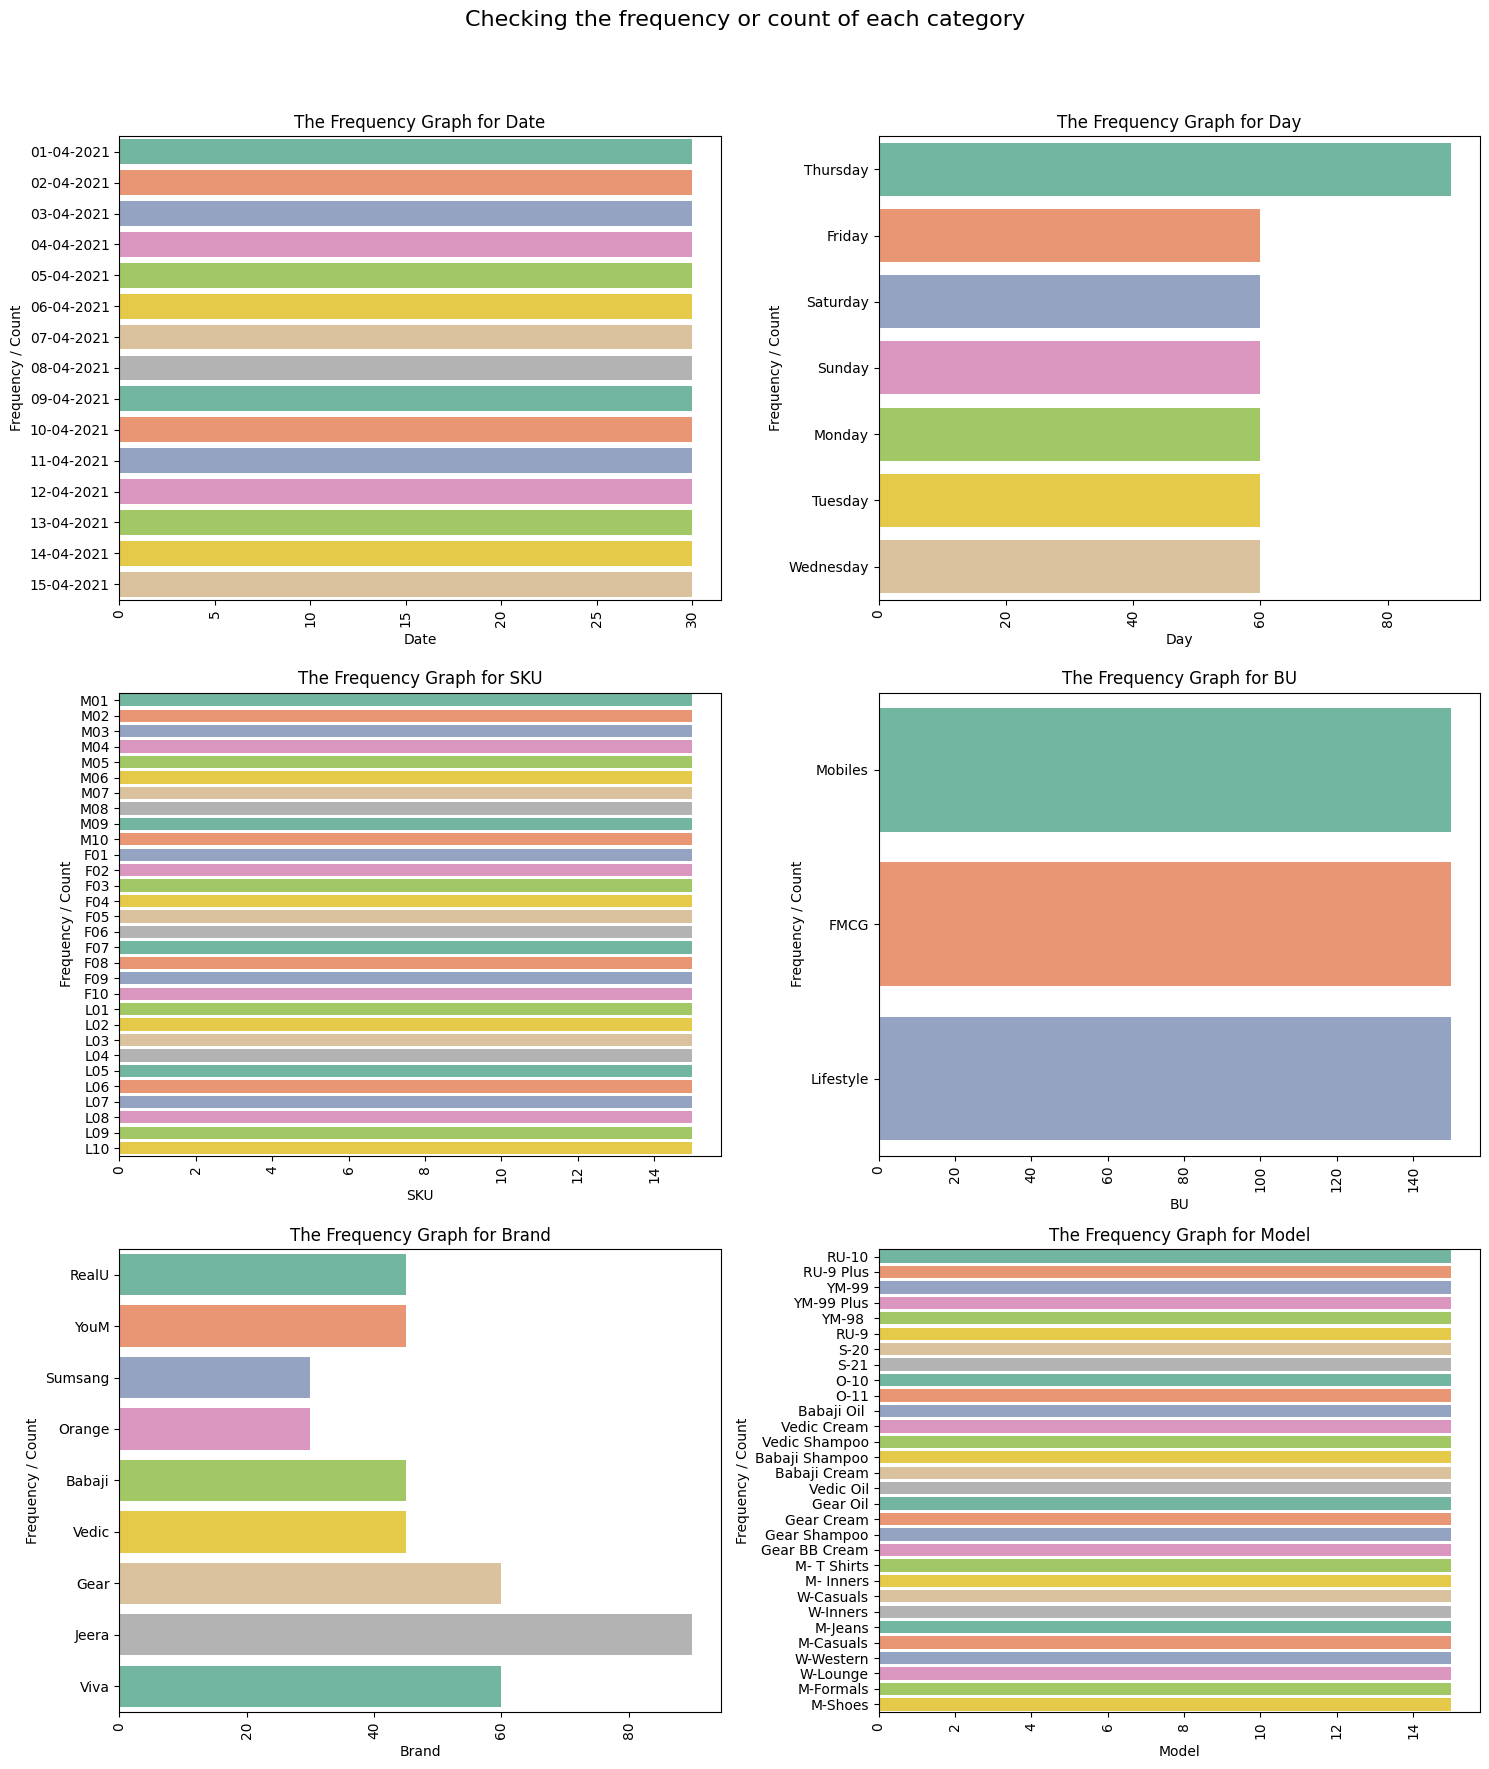

In [93]:
plt.figure(figsize=(15,18))
plt.suptitle('Checking the frequency or count of each category', fontsize=16)

for idx, i in enumerate(cat_cols, 1):
    plt.subplot(3, 2, idx)
    sns.countplot(data=cat_cols, y=cat_cols[i], hue=cat_cols[i], palette='Set2')
    plt.title(f'The Frequency Graph for {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency / Count')
    plt.xticks(rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## <span style='color:#798645'>Providing Insights with the above Bar Charts</span>

So from the above bar charts we can see that the columns [Date, SKU, BU, Model] these four bar chart don't have anything to compare and analyse them, as we can clearly see that each of the columns have items being repeated only a single time.

But, we need analyze [Day, Brand] columns, as we can see there is some varaition present in the columns.

1. Day:
   We can see the Frequency of 'Thursday' is more as compare to other Days, which implies that there will be more number of Thursday present in the data. And we can conclude that there is more likely be crowd in the market at 'Thursday'. <br>
   But, other days have same number of repeatation, that of which we can conclude that other than Thursday we can get visitors to be same in every other days. <br>

2. Brand:
   As we can see that there is a larger sale in 'Jeera', and we can see that the minimum number of sale is of ['Sumsang','Orange']. We also have a medial level of sales in the data like, ['ReaIU', 'YouM', 'Babaji', 'Vedic']. <br>
   The maximum sale i.e., 'Jeera' is likely to be 90 <br>
   The medival sale is around 50 <br>
   The minimum sale i.e., 'Sumsang' and 'Orange' is close to 30 <br>

## <span style='color:#629584'> Standardization of Numerical Values </span>
#### <span style='color:#798645'>Concept of Standardization</span>

Standardization is used for scalling the data, particularly in the context of machine learning, data analysis and static modelling. They are often used to ensure that fearures have comparable scales, that prevents any one feature from dominating the model simply because of its larger magnitude.

#### Standardization also known as Z-Score Normalization transforms the data to have mean of 0 and standard deviation of 1. It rescales the data so that follows a standard normal deviation

#### When Standardization is used
1. Machine Learning Algorithms
        Support Vector Machine (SVM) <br>
        K-Nearest Neighbors (K-NN) <br>
        Principal Component Analysis <br>
        Logistic Regression and Linear Regression <br>
2. Gradient Based Algorithms
3. Assumption of Normality
   

In [100]:
num_cols.columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [102]:
mean_unstd = num_cols.mean()
print(f'The mean of the numerical columns before standardization is ')
print(mean_unstd)

The mean of the numerical columns before standardization is 
Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [103]:
std_unstd = num_cols.std()
print('The standard deviation of the numerical columns before standardization is')
print(std_unstd)

The standard deviation of the numerical columns before standardization is
Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


## <span style='color:#798645'>Standardizing the Columns</span>

### <span style='color:#798645'>Steps to Standardize the Numerical Columns</span>
#### <span style='color:#798645'>A. With using the libraries</span>
##### 1. Import the library
    from sklearn.preprocessing import StandardScaler
##### 2. Create an instance of StandardScaler
    scaler = StandardScaler()
##### 3. Fit the scaler on the nhmerical columns and transform the data
    standardized_data = scaler.fit_transform(data[numerical_cols])
##### 4. Covert the result back to a DataFrame with column names
    standardized_df = pd.DataFrame(standardized_data, columns = numerical_cols)

#### <span style='color:#798645'>B. Without using the libraries</span>
##### 1. Calculate the mean and standard deviation 
    means = data[numerical_cols].mean()
    std = data[numerical_cols].std()
##### 2. Standardize the columns:
    Use the z-score formula for standardizing each column
    standardized_data = (data[numercial_cols]-means) / std

In [127]:
# Before standardizing the columns let's copy the columns into a new variable/dataframe for easy manipulation.
before_std = num_cols
numerical_cols = num_cols.columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

Now, lets standardize the 'before_std' dataframe.

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
after_std = scaler.fit_transform(before_std[numerical_cols])
standardized_df = pd.DataFrame(after_std, columns = numerical_cols)
standardized_df.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


##### Now let's have comparison of the distribution of the data before and after standardization

In [129]:
before_std.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


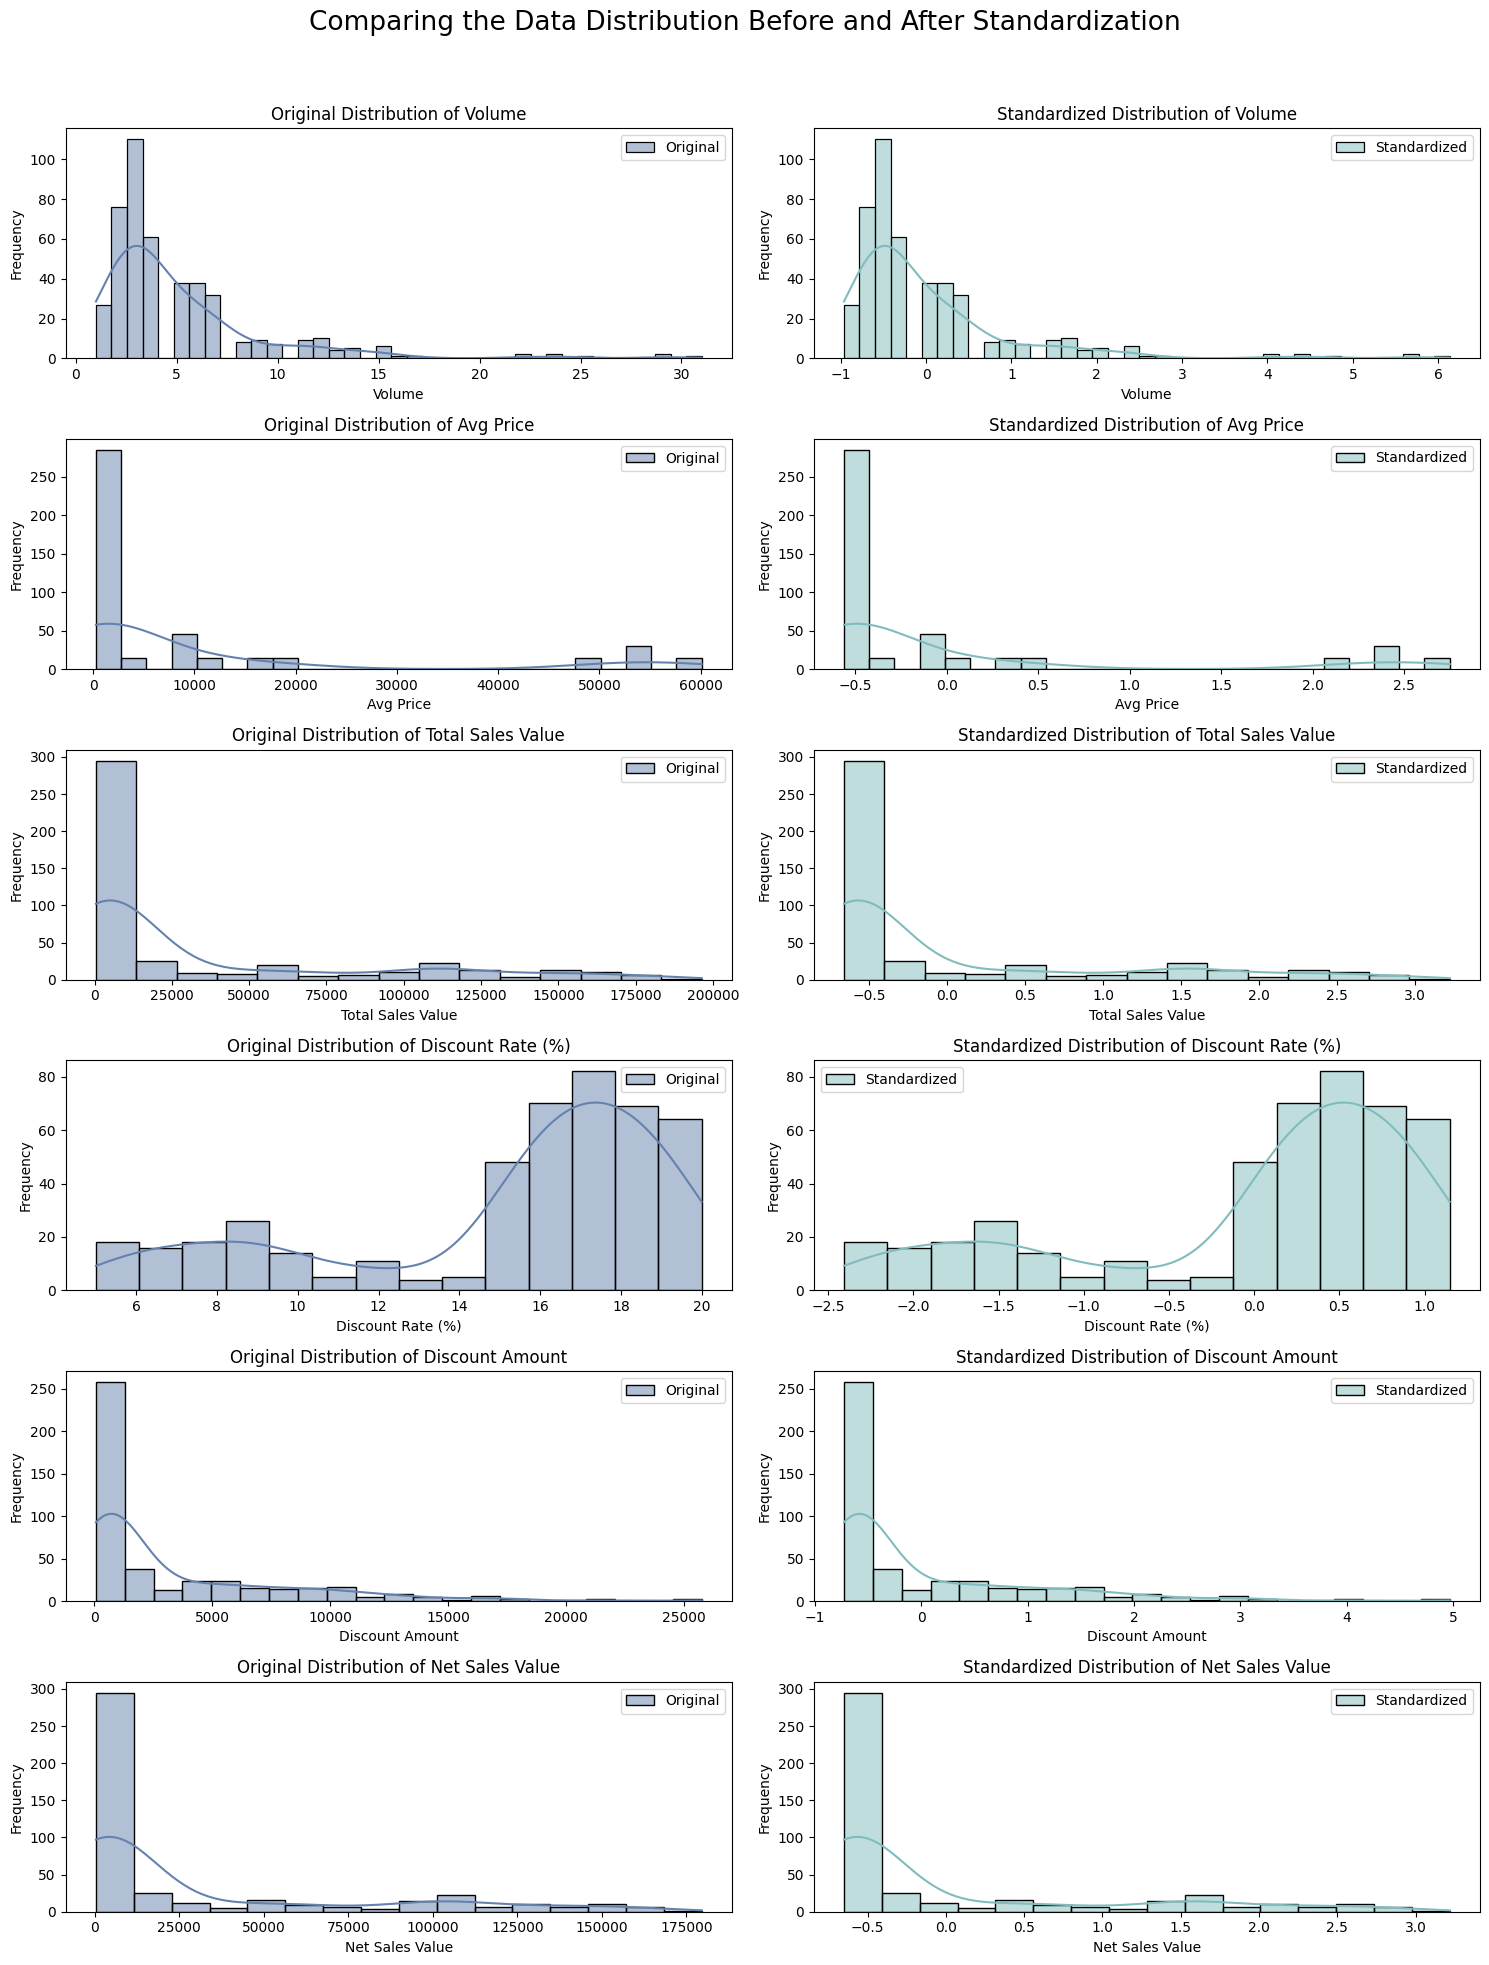

In [134]:
plt.figure(figsize=(15, 20))
plt.suptitle('Comparing the Data Distribution Before and After Standardization', fontsize=19)


for idx, col in enumerate(numerical_cols):

    plt.subplot(6, 2, 2*idx + 1)
    sns.histplot(data[col], kde=True, color='#6482AD', label='Original')
    plt.title(f'Original Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()


    plt.subplot(6, 2, 2*idx + 2)
    sns.histplot(standardized_df[col], kde=True, color='#80BCBD', label='Standardized')
    plt.title(f'Standardized Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### After standardization, the shape of the data distribution remains the same, but the scale changes.

##### What Changes
    The mean of the standardized data become 0.
    The standard deviation become 1.
    The values are rescaled to have a common range, but the relative positioning of the data points stays intact.

##### What remains the same
    The underlying distribution remains the same. Standardization does not affect the shape, skewness, or the number of peaks in the data.
    Outliers will still be present, their positions relative to the rest of the data will remain the same but on a standardized scale.

#### Conclusion
Standardization makes the data more uniform and suitable for modeling without altering the underlying distribution shapes. This preprocessing step ensures that features with different units and ranges don't skew the model training process.

## <span style='color:#798645'>Converting of Categorical Data into Dummy Variables (One-Hot Encoding)</span>
### <span style='color:#798645'>The need of converting the Data into Dummy Variables</span>

##### Machine Learning Algorithms:
    Many algorithms (like linear regression, decision trees, or neaural networks) cannot work directly with categorical data in string format. They require numerical input.
##### One-Hot-Encoding: 
    This is popular method for converting categorical varaibles into a set of binary columns, where each catefory becomes a separate column with values of 0 or 1.

So, let's perform the One-Hot-Encoding

In [136]:
cat_cols.head()

,Date,Day,SKU,BU,Brand,Model
0,01-04-2021,Thursday,M01,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,Mobiles,YouM,YM-98


So, we have the Cateogrical Columns present in the data. <br>

But we do not need the 'Date' column because it has only the single values, therefore there is no point of converting them. <br>

And hence we need to drop that column.

In [138]:
cat_cols.drop(columns=['Date'], inplace = True)
cat_cols.columns

Index(['Day', 'SKU', 'BU', 'Brand', 'Model'], dtype='object')

And we have removed the 'Date' column <br>
Now we can perform one-hot-encoding in the rest of the columns present in the Data Frame.

In [140]:
encoded_df = pd.get_dummies(cat_cols, columns = cat_cols.columns)
encoded_df = encoded_df.astype(int)
encoded_df.head()

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,SKU_F04,SKU_F05,SKU_F06,SKU_F07,SKU_F08,SKU_F09,SKU_F10,SKU_L01,SKU_L02,SKU_L03,SKU_L04,SKU_L05,SKU_L06,SKU_L07,SKU_L08,SKU_L09,SKU_L10,SKU_M01,SKU_M02,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10,BU_FMCG,BU_Lifestyle,BU_Mobiles,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM,Model_Babaji Cream,Model_Babaji Oil,Model_Babaji Shampoo,Model_Gear BB Cream,Model_Gear Cream,Model_Gear Oil,Model_Gear Shampoo,Model_M- Inners,Model_M- T Shirts,Model_M-Casuals,Model_M-Formals,Model_M-Jeans,Model_M-Shoes,Model_O-10,Model_O-11,Model_RU-10,Model_RU-9,Model_RU-9 Plus,Model_S-20,Model_S-21,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Let's learn the description of the new encoded data frame

In [144]:
encoded_df.shape

(450, 79)

so we have 450 columns with 79 rows

## <span style='color:#798645'>Key Findigs from Descriptive Analytics and Data Visualization</span>

### <span style='color:#798645'>1. Numerical Data Distribution</span>
##### Volume:
    The data showed a right-skewed distribution with most transaction involving lower quantities (typically 3-4 units). A few large transactions were identified as outliers.
##### Avg Price:
    The preices were highly variable, with a few high priced products causing a long right tail in the distribution.
##### Total Sales Value:
    Similar to the price, total sales wre concentrated around lower values, with occasional large transaction driving the average up.
##### Discount Rate:
     Discount percentages were normally distributed around 15%, with some variability but no extreme outliers.
##### Discount Amount:
    Most discounts were relatively low, though a few large discounts were applied to high-priced products.
##### Net Sales Value:
    This metric followed a similar pattern to total sales, with a few high-value transactions skewing the distribution.

### <span style='color:#798645'>2. Categorical Data Insights</span>
##### Day:
    Sales were distributed fairly evenly across the week, though certain days (like weekends) may have shown slightly higher sales.
##### City:
    Certain cities had higher sales counts, likely indicating key markets for the business.
##### BU (Business Unit): 
    One business unit may have dominated the sales data, highlighting a focus on specific product categories.
##### Brand/Model: 
    Some brands and models had significantly higher sales, indicating customer preferences or market trends.

## <span style='color:#798645'>Importance of Data Preprocessing Steps: </span>
#### 1. Standardization:
##### Why it's Important: 
    Standardization ensures that all numerical features are on the same scale, which is critical for many machine learning algorithms that rely on distance metrics (e.g., k-NN, SVM) or gradient descent-based optimization (e.g., linear regression, neural networks).
##### Impact on Analysis: 
    Before standardization, the data showed wide variability in ranges (e.g., Avg Price and Total Sales Value had much larger values than Discount Rate or Volume). This can cause models to place undue weight on features with larger numerical ranges. Standardization ensures that each feature contributes equally, improving model performance and convergence.

#### 2. One-Hot-Encoding:
##### Why it's Important: 
    Machine learning models can't work with categorical data directly, as they require numerical input. One-hot encoding converts categorical variables into a binary (0 or 1) format, making them usable in algorithms.
##### Impact on Analysis: 
    Without one-hot encoding, categorical variables such as City, Brand, or Model would be unusable in many machine learning models. By converting them into dummy variables, these features can now contribute valuable information to the analysis. Additionally, drop_first=True in one-hot encoding prevents multicollinearity, avoiding redundant columns.

## <span style='color:#798645'>Final Conclusion:</span>
##### Descriptive Analytics: 
    These steps helped uncover key patterns and distributions in the dataset. Skewness, outliers, and variability were identified, offering insights into sales behaviors, product preferences, and discount strategies.

##### Preprocessing: 
    Proper preprocessing is crucial for data quality and model performance. Standardization and one-hot encoding transform raw data into a format that models can effectively work with, ensuring better predictions and reducing bias caused by varying scales or categorical features.